IMPORTANDO BIBLIOTECAS EXPLORATÓRIAS DO PYTHON

In [44]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
import seaborn as sns




Lendo a Base de Dados

Fonte do Dado:https://olinda.bcb.gov.br/olinda/servico/MPV_DadosAbertos/versao/v1/aplicacao#!/recursos/Quantidadeetransacoesdecartoes

In [45]:
dados_cartoes= pd.read_csv('/Estoque.csv', sep=';')


dados=dados_cartoes.drop(columns=['Unnamed: 10','Unnamed: 11'] )

In [46]:
dados.head()

,trimestre,nomeBandeira,nomeFuncao,produto,qtdCartoesEmitidos,qtdCartoesAtivos,qtdTransacoesNacionais,valorTransacoesNacionais,qtdTransacoesInternacionais,valorTransacoesInternacionais,ano
0,20213,Bandeira propria,Credito,Basico Nacional,1938972,535612,2741493,521339586,0,0,2021
1,20232,VISA,Credito,Empresarial,3521641,2173436,41594872,12547655589,468389,396967163,2023
2,20213,VISA,Debito,Intermediario,3745393,2347388,59581444,4814915281,490,101639,2021
3,20211,MasterCard,Debito,Basico Internacional,83088117,21554284,567370086,39064611986,27511,9502222,2021
4,20211,MasterCard,Credito,Premium,2197074,1785104,107175156,21107092218,1234605,631224037,2021


In [47]:
dados.columns

Index(['trimestre', 'nomeBandeira', 'nomeFuncao', 'produto',
       'qtdCartoesEmitidos', 'qtdCartoesAtivos', 'qtdTransacoesNacionais',
       'valorTransacoesNacionais', 'qtdTransacoesInternacionais',
       'valorTransacoesInternacionais', 'ano'],
      dtype='object')

In [48]:
dados.dtypes

trimestre                         int64
nomeBandeira                     object
nomeFuncao                       object
produto                          object
qtdCartoesEmitidos                int64
qtdCartoesAtivos                  int64
qtdTransacoesNacionais            int64
valorTransacoesNacionais          int64
qtdTransacoesInternacionais       int64
valorTransacoesInternacionais     int64
ano                               int64
dtype: object

In [49]:
dados.shape

(1630, 11)

In [50]:
dados.nunique()

trimestre                          24
nomeBandeira                        8
nomeFuncao                          3
produto                             8
qtdCartoesEmitidos               1616
qtdCartoesAtivos                 1601
qtdTransacoesNacionais           1606
valorTransacoesNacionais         1613
qtdTransacoesInternacionais      1163
valorTransacoesInternacionais    1247
ano                                 6
dtype: int64

In [51]:
dados.duplicated().sum()

0

In [52]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   trimestre                      1630 non-null   int64 
 1   nomeBandeira                   1630 non-null   object
 2   nomeFuncao                     1630 non-null   object
 3   produto                        1630 non-null   object
 4   qtdCartoesEmitidos             1630 non-null   int64 
 5   qtdCartoesAtivos               1630 non-null   int64 
 6   qtdTransacoesNacionais         1630 non-null   int64 
 7   valorTransacoesNacionais       1630 non-null   int64 
 8   qtdTransacoesInternacionais    1630 non-null   int64 
 9   valorTransacoesInternacionais  1630 non-null   int64 
 10  ano                            1630 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 140.2+ KB


In [53]:
dados.describe()

,trimestre,qtdCartoesEmitidos,qtdCartoesAtivos,qtdTransacoesNacionais,valorTransacoesNacionais,qtdTransacoesInternacionais,valorTransacoesInternacionais,ano
count,1630.000000,1.630000e+03,1.630000e+03,1.630000e+03,1.630000e+03,1.630000e+03,1.630000e+03,1630.000000
mean,20208.574233,1.212208e+07,4.971591e+06,1.082023e+08,8.900494e+09,3.446622e+05,1.167607e+08,2020.606135
std,17.151055,2.798092e+07,1.091243e+07,2.251019e+08,1.703302e+10,8.979939e+05,3.364437e+08,1.710678
min,20181.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2018.000000
25%,20193.000000,2.506152e+05,1.145920e+05,1.786496e+06,2.265293e+08,4.000000e+00,8.980000e+02,2019.000000
50%,20211.000000,1.511627e+06,6.270850e+05,1.307913e+07,1.528504e+09,4.614500e+03,1.454510e+06,2021.000000
75%,20223.000000,9.749103e+06,4.059627e+06,7.744801e+07,7.732956e+09,1.648348e+05,4.440859e+07,2022.000000
max,20234.000000,2.084751e+08,1.202561e+08,1.452559e+09,1.414362e+11,7.202596e+06,3.788746e+09,2023.000000


In [54]:
## Exporando os tipos de Bandeiras dos Cartões de Crédito

In [55]:
dados.nomeBandeira.unique()


array(['Bandeira propria', 'VISA', 'MasterCard', 'Elo',
       'American Express', 'Outras', 'Hipercard', 'Diners Club'],
      dtype=object)

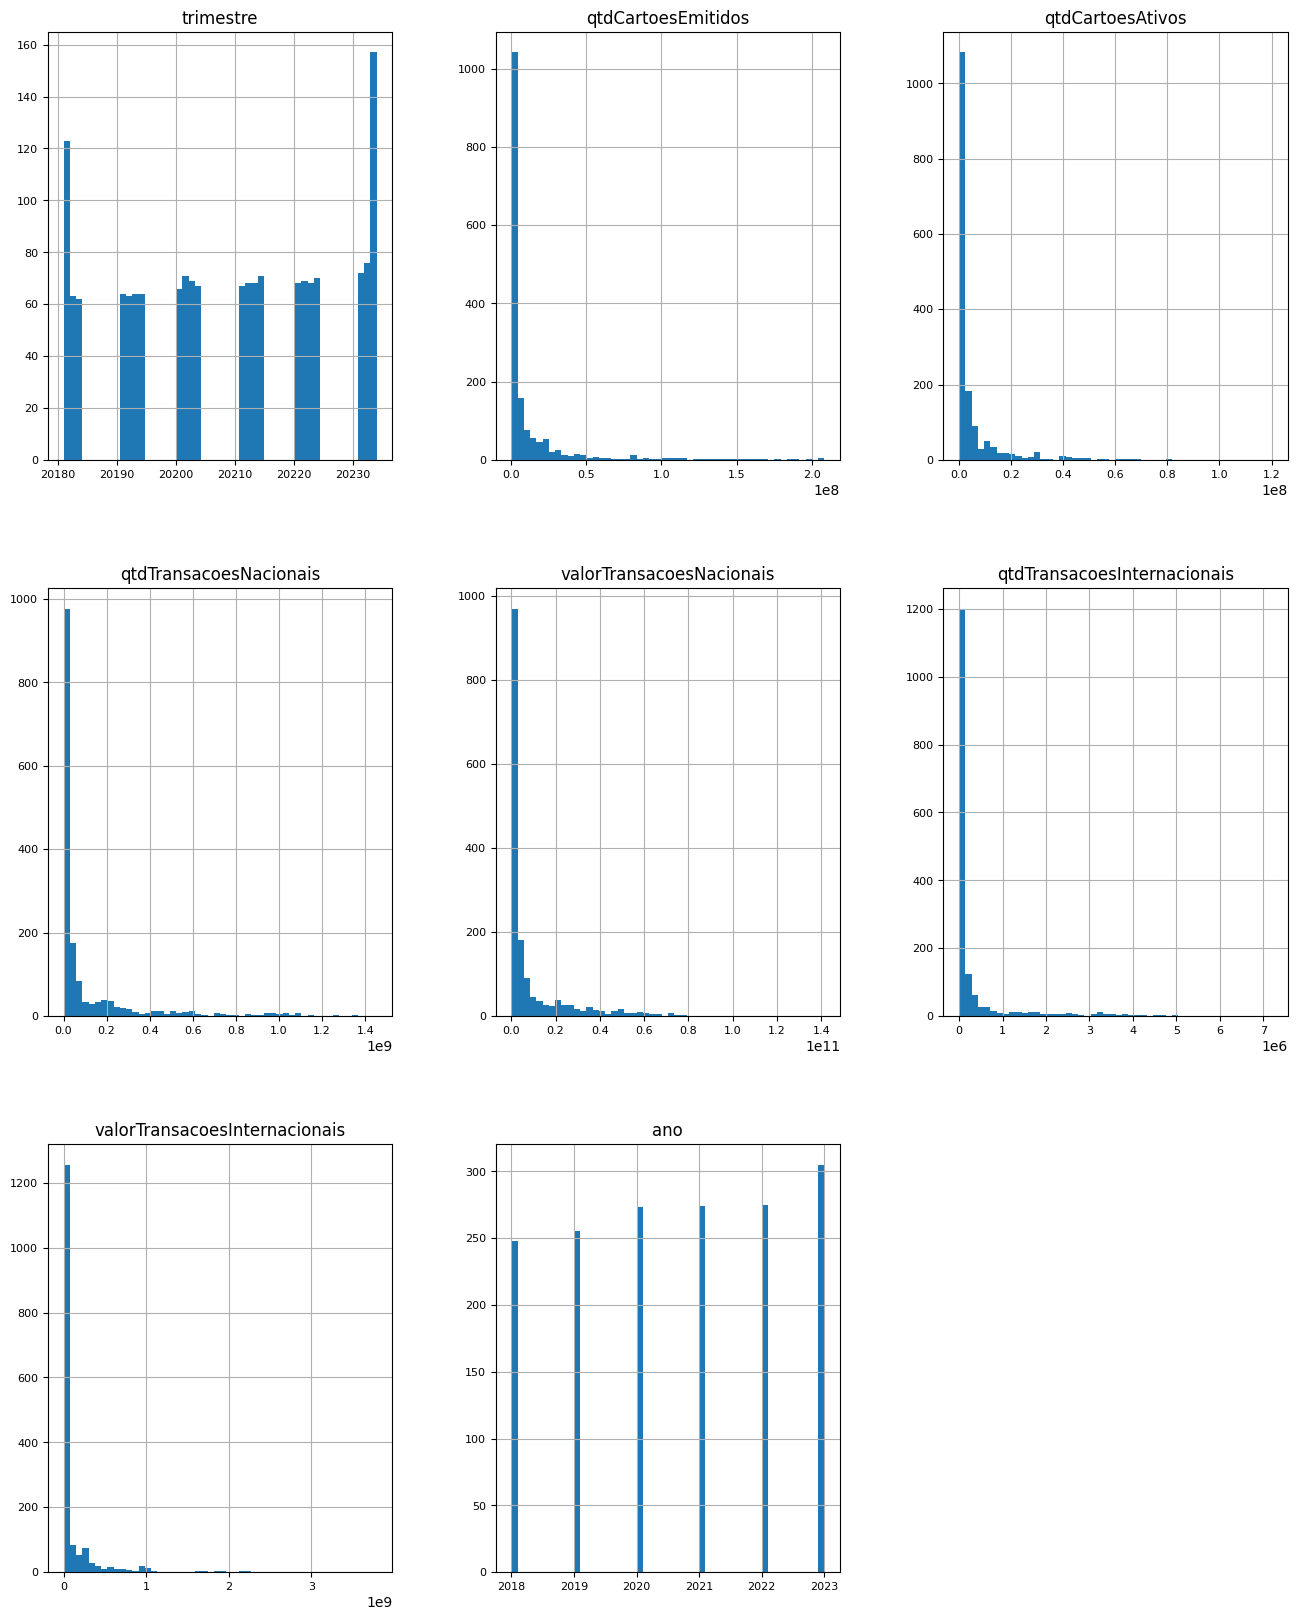

In [56]:
dados.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

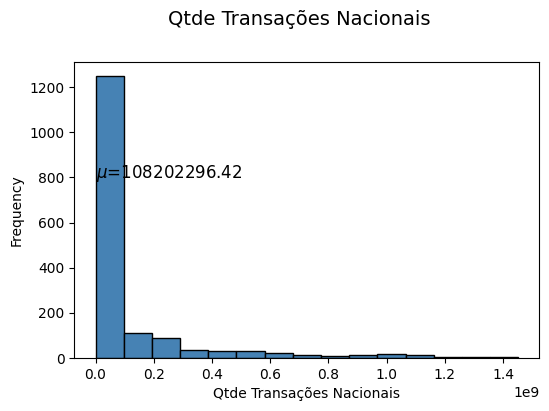

In [57]:
# Histograma
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Qtde Transações Nacionais", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Qtde Transações Nacionais")
ax.set_ylabel("Frequency")
ax.text(1.2, 800, r'$\mu$='+str(round(dados['qtdTransacoesNacionais'].mean(),2)),
         fontsize=12)
freq, bins, patches = ax.hist(dados['qtdTransacoesNacionais'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)


<ipython-input-58-ef0de7a56b27>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dados['qtdTransacoesNacionais'], ax=ax1, shade=True, color='steelblue')


<Axes: xlabel='Qtde Transações Nacionais', ylabel='Frequency'>

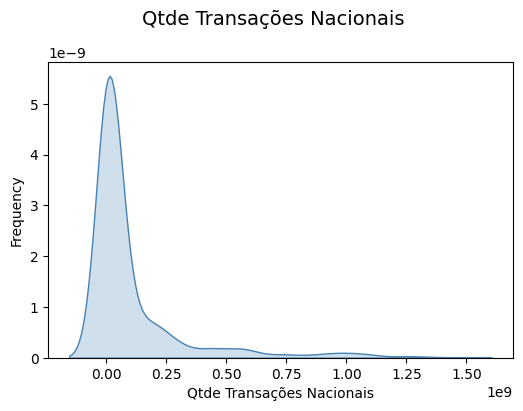

In [58]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Qtde Transações Nacionais", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Qtde Transações Nacionais")
ax1.set_ylabel("Frequency")
sns.kdeplot(dados['qtdTransacoesNacionais'], ax=ax1, shade=True, color='steelblue')

In [ ]:
##Separando por Tipo de Bandeira

In [59]:
dados['nomeBandeira'].value_counts().sort_index()


nomeBandeira
American Express    122
Bandeira propria     88
Diners Club           4
Elo                 299
Hipercard            37
MasterCard          519
Outras               67
VISA                494
Name: count, dtype: int64

Text(0, 0.5, 'Valor Transações Nacionais')

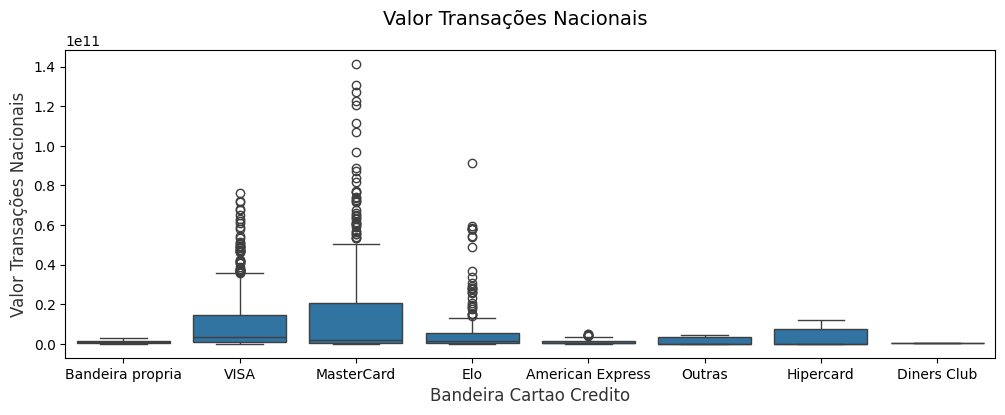

In [60]:
# Box Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Valor Transações Nacionais', fontsize=14)

sns.boxplot(x="nomeBandeira", y="valorTransacoesNacionais", data=dados,  ax=ax)
ax.set_xlabel("Bandeira Cartao Credito",size = 12,alpha=0.8)
ax.set_ylabel("Valor Transações Nacionais",size = 12,alpha=0.8)

In [61]:
dados['ano'] = dados['trimestre']//10


In [62]:
dados.head()

,trimestre,nomeBandeira,nomeFuncao,produto,qtdCartoesEmitidos,qtdCartoesAtivos,qtdTransacoesNacionais,valorTransacoesNacionais,qtdTransacoesInternacionais,valorTransacoesInternacionais,ano
0,20213,Bandeira propria,Credito,Basico Nacional,1938972,535612,2741493,521339586,0,0,2021
1,20232,VISA,Credito,Empresarial,3521641,2173436,41594872,12547655589,468389,396967163,2023
2,20213,VISA,Debito,Intermediario,3745393,2347388,59581444,4814915281,490,101639,2021
3,20211,MasterCard,Debito,Basico Internacional,83088117,21554284,567370086,39064611986,27511,9502222,2021
4,20211,MasterCard,Credito,Premium,2197074,1785104,107175156,21107092218,1234605,631224037,2021


Text(0, 0.5, 'Valor Transações Nacionais')

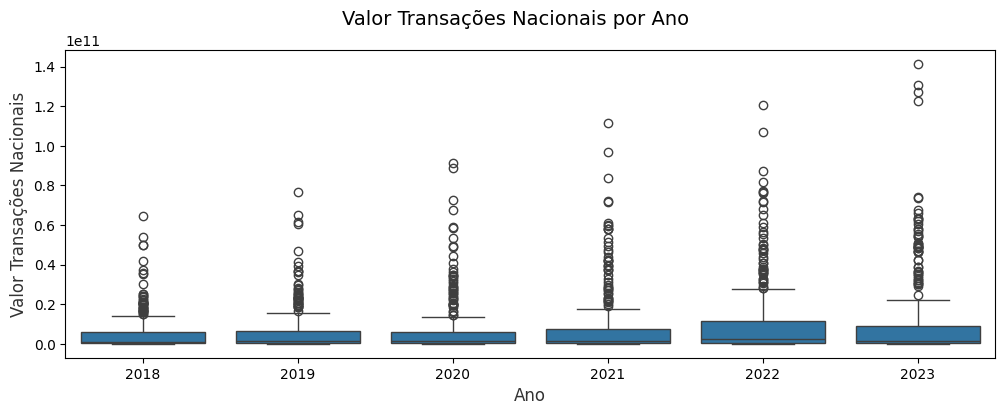

In [63]:
# Box Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Valor Transações Nacionais por Ano', fontsize=14)

sns.boxplot(x="ano", y="valorTransacoesNacionais", data=dados,  ax=ax)
ax.set_xlabel("Ano",size = 12,alpha=0.8)
ax.set_ylabel("Valor Transações Nacionais",size = 12,alpha=0.8)

Text(0, 0.5, 'Valor Transações Internacionais')

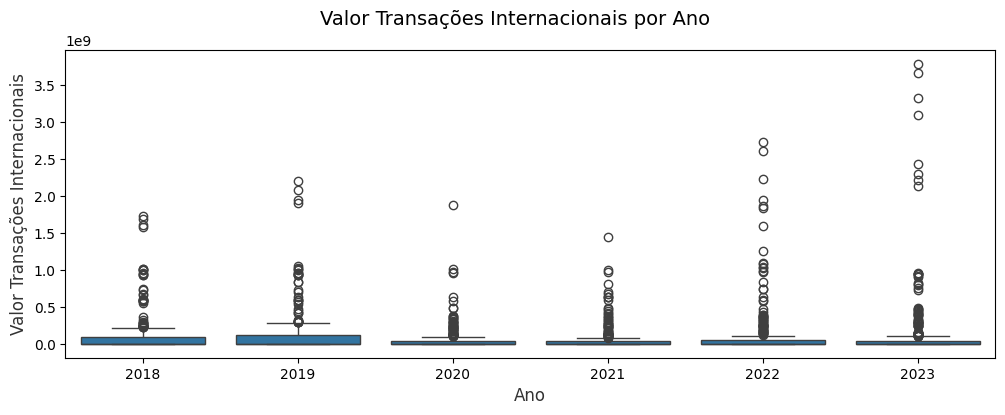

In [64]:
# Box Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Valor Transações Internacionais por Ano', fontsize=14)

sns.boxplot(x="ano", y="valorTransacoesInternacionais", data=dados,  ax=ax)
ax.set_xlabel("Ano",size = 12,alpha=0.8)
ax.set_ylabel("Valor Transações Internacionais",size = 12,alpha=0.8)

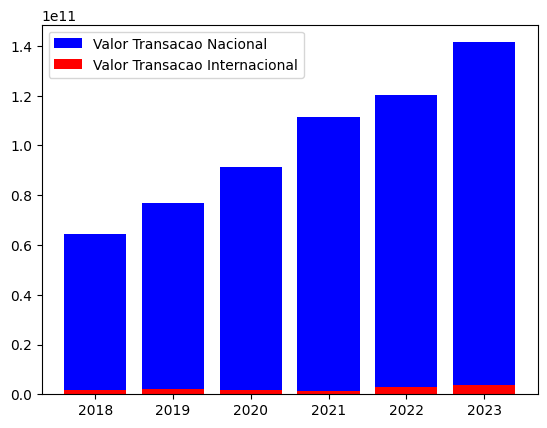

In [76]:
plt.bar(dados['ano'],dados['valorTransacoesNacionais'],label='Valor Transacao Nacional',color='blue')
plt.bar(dados['ano'],dados['valorTransacoesInternacionais'],label='Valor Transacao Internacional',color='red')
plt.legend()
plt.show()

